# Simulation 11: Seq Greedy v. Naive Timestep Sweep

TJ Kim
1/10/21

Run the eleventh simulation with the following considerations.

- 10 Servers, 15 Users, 50 TS
- Use ONE-mobility
- Job lengths: vr = 50, Assist = 50, AR = 50
- We share the same users and jobs between simulations

Resources: Normal
- All jobs are run with standard Quantity
- 14 level 1, 5 level 2, 1 level 3

In [1]:
from IPython.core.debugger import set_trace

# Import Generic Classes
import numpy as np
import copy
import pickle
import random

# Import All Custom Classes
import os, sys
sys.path.append(os.path.pardir+"/classes")
sys.path.append(os.path.pardir+"/solvers")
sys.path.append(os.path.pardir+"/one_mobility")
sys.path.append(os.path.curdir + "/sim_store/sim11")


from Server import *
from User import *
from Link import *
from Job import *
from Migration_Plans import *
from Cost_Recordings import *

from sim11_setting import *

# Import Solver Classes
from Optim_PlanGenerator import *
from SeqGreedy_PlanGenerator import *
from Myopic_PlanGenerator import *
from Naive_PlanGenerator import *
from Cloud_PlanGenerator import *

### Run Simulation across 10 trials for the groups

Heuristics - Sequential Greedy 

Baseline - Naive

In [2]:
num_trials = 10
SG_cost_stores = []
Naive_cost_stores = []
for i in range(num_trials):
    
    print("Trial Number:",i)

    users, servers, links, jobs, sim_param = simulation_setting()
    
    # Make SG Prob
    # Set Refresh to false for SG
    refresh_rate = [0,0]
    refresh = False

    jobs2 = copy.deepcopy(jobs)
    for j in range(len(jobs2)):
        jobs2[j].info_from_usr(users[j],refresh_rate,refresh)
    
    print("SG prob...")
    SG_prob = SeqGreedy_PlanGenerator(users, servers, links, jobs2, sim_param)
    SG_plan = Migration_Plans(users,jobs2,sim_param)
    SG_plan.from_seq_greedy(SG_prob)
    SG_cost_stores += [Cost_Recordings(SG_plan)]
    print("done!")
    
    # Make Naive Prob
    print("Naive prob...")
    Naive_prob = Naive_PlanGenerator(users, servers, links, jobs, sim_param)
    Naive_plan = Migration_Plans(users,jobs,sim_param)
    Naive_plan.from_seq_greedy(Naive_prob)
    Naive_cost_stores += [Cost_Recordings(Naive_plan)]
    print("done!")
    

Trial Number: 0
SG prob...
Struck Placement Resource (j,s,t): 11 8 7
Struck Placement Resource (j,s,t): 11 8 8
Struck Placement Resource (j,s,t): 11 8 9
Struck Placement Resource (j,s,t): 11 8 10
Struck Placement Resource (j,s,t): 11 8 11
Struck Placement Resource (j,s,t): 11 8 12
Struck Placement Resource (j,s,t): 11 8 13
Struck Placement Resource (j,s,t): 11 8 14
Struck Placement Resource (j,s,t): 11 8 15
Struck Placement Resource (j,s,t): 11 8 16
Struck Placement Resource (j,s,t): 11 8 17
Struck Placement Resource (j,s,t): 11 8 18
Struck Placement Resource (j,s,t): 11 8 19
Struck Placement Resource (j,s,t): 11 8 20
Struck Placement Resource (j,s,t): 11 8 21
Struck Placement Resource (j,s,t): 11 8 22
Struck Placement Resource (j,s,t): 11 8 23
Struck Placement Resource (j,s,t): 11 8 24
Struck Placement Resource (j,s,t): 11 8 25
Struck Placement Resource (j,s,t): 11 8 26
Struck Placement Resource (j,s,t): 11 8 27
Struck Placement Resource (j,s,t): 11 8 28
Struck Placement Resource (j,s

Struck Placement Resource (j,s,t): 15 8 1
Struck Placement Resource (j,s,t): 15 8 2
Struck Placement Resource (j,s,t): 15 8 3
Struck Placement Resource (j,s,t): 15 8 4
Struck Placement Resource (j,s,t): 15 8 5
Struck Placement Resource (j,s,t): 15 8 6
Struck Placement Resource (j,s,t): 15 8 7
Struck Placement Resource (j,s,t): 15 8 8
Struck Placement Resource (j,s,t): 15 8 9
Struck Placement Resource (j,s,t): 15 8 10
Struck Placement Resource (j,s,t): 15 8 11
Struck Placement Resource (j,s,t): 15 8 12
Struck Placement Resource (j,s,t): 15 8 13
Struck Placement Resource (j,s,t): 15 8 14
Struck Placement Resource (j,s,t): 15 8 15
Struck Placement Resource (j,s,t): 15 8 16
Struck Placement Resource (j,s,t): 15 8 17
Struck Placement Resource (j,s,t): 15 8 18
Struck Placement Resource (j,s,t): 15 8 19
Struck Placement Resource (j,s,t): 15 8 20
Struck Placement Resource (j,s,t): 15 8 21
Struck Placement Resource (j,s,t): 15 8 22
Struck Placement Resource (j,s,t): 15 8 23
Struck Placement Res

Struck Placement Resource (j,s,t): 17 2 0
Struck Placement Resource (j,s,t): 17 2 1
Struck Placement Resource (j,s,t): 17 2 2
Struck Placement Resource (j,s,t): 17 2 3
Struck Placement Resource (j,s,t): 17 2 4
Struck Placement Resource (j,s,t): 17 2 5
Struck Placement Resource (j,s,t): 17 8 6
Struck Placement Resource (j,s,t): 17 8 7
Struck Placement Resource (j,s,t): 17 8 8
Struck Placement Resource (j,s,t): 17 8 9
Struck Placement Resource (j,s,t): 17 8 10
Struck Placement Resource (j,s,t): 17 8 11
Struck Placement Resource (j,s,t): 17 8 12
Struck Placement Resource (j,s,t): 17 8 13
Struck Placement Resource (j,s,t): 17 8 14
Struck Placement Resource (j,s,t): 17 8 15
Struck Placement Resource (j,s,t): 17 8 16
Struck Placement Resource (j,s,t): 17 8 17
Struck Placement Resource (j,s,t): 17 8 18
Struck Placement Resource (j,s,t): 17 8 19
Struck Placement Resource (j,s,t): 17 8 20
Struck Placement Resource (j,s,t): 17 8 21
Struck Placement Resource (j,s,t): 17 8 22
Struck Placement Reso

Struck Placement Resource (j,s,t): 19 8 3
Struck Placement Resource (j,s,t): 19 8 4
Struck Placement Resource (j,s,t): 19 8 5
Struck Placement Resource (j,s,t): 19 8 6
Struck Placement Resource (j,s,t): 19 8 7
Struck Placement Resource (j,s,t): 19 8 8
Struck Placement Resource (j,s,t): 19 8 9
Struck Placement Resource (j,s,t): 19 8 10
Struck Placement Resource (j,s,t): 19 8 11
Struck Placement Resource (j,s,t): 19 8 12
Struck Placement Resource (j,s,t): 19 8 13
Struck Placement Resource (j,s,t): 19 8 14
Struck Placement Resource (j,s,t): 19 8 15
Struck Placement Resource (j,s,t): 19 8 16
Struck Placement Resource (j,s,t): 19 8 17
Struck Placement Resource (j,s,t): 19 8 18
Struck Placement Resource (j,s,t): 19 8 19
Struck Placement Resource (j,s,t): 19 8 20
Struck Placement Resource (j,s,t): 19 8 21
Struck Placement Resource (j,s,t): 19 8 22
Struck Placement Resource (j,s,t): 19 8 23
Struck Placement Resource (j,s,t): 19 8 24
Struck Placement Resource (j,s,t): 19 8 25
Struck Placement R

done!
Trial Number: 1
SG prob...
Struck Placement Resource (j,s,t): 11 6 17
Struck Placement Resource (j,s,t): 11 6 18
Struck Placement Resource (j,s,t): 11 6 19
Struck Placement Resource (j,s,t): 11 6 20
Struck Placement Resource (j,s,t): 11 6 21
Struck Placement Resource (j,s,t): 11 6 22
Struck Placement Resource (j,s,t): 11 6 23
Struck Placement Resource (j,s,t): 12 6 12
Struck Placement Resource (j,s,t): 12 6 13
Struck Placement Resource (j,s,t): 12 6 14
Struck Placement Resource (j,s,t): 12 6 15
Struck Placement Resource (j,s,t): 12 6 16
Struck Placement Resource (j,s,t): 12 6 17
Struck Placement Resource (j,s,t): 12 6 18
Struck Placement Resource (j,s,t): 12 6 19
Struck Placement Resource (j,s,t): 12 6 20
Struck Placement Resource (j,s,t): 12 6 21
Struck Placement Resource (j,s,t): 12 6 22
Struck Placement Resource (j,s,t): 12 6 23
Struck Placement Resource (j,s,t): 12 6 24
Struck Placement Resource (j,s,t): 12 6 25
Struck Placement Resource (j,s,t): 12 6 26
Struck Placement Reso

done!
Trial Number: 2
SG prob...
Struck Placement Resource (j,s,t): 10 6 26
Struck Placement Resource (j,s,t): 10 6 27
Struck Placement Resource (j,s,t): 10 6 28
Struck Placement Resource (j,s,t): 10 6 29
Struck Placement Resource (j,s,t): 11 6 11
Struck Placement Resource (j,s,t): 11 6 12
Struck Placement Resource (j,s,t): 11 6 13
Struck Placement Resource (j,s,t): 11 6 16
Struck Placement Resource (j,s,t): 11 6 17
Struck Placement Resource (j,s,t): 11 6 18
Struck Placement Resource (j,s,t): 11 6 19
Struck Placement Resource (j,s,t): 11 6 20
Struck Placement Resource (j,s,t): 11 6 21
Struck Placement Resource (j,s,t): 11 6 26
Struck Placement Resource (j,s,t): 11 6 27
Struck Placement Resource (j,s,t): 11 6 28
Struck Placement Resource (j,s,t): 11 6 29
Struck Placement Resource (j,s,t): 11 6 30
Struck Placement Resource (j,s,t): 11 6 39
Struck Placement Resource (j,s,t): 11 6 40
Struck Placement Resource (j,s,t): 11 6 41
Struck Placement Resource (j,s,t): 11 6 42
Struck Placement Reso

Struck Placement Resource (j,s,t): 18 6 3
Struck Placement Resource (j,s,t): 18 6 4
Struck Placement Resource (j,s,t): 18 6 5
Struck Placement Resource (j,s,t): 18 6 11
Struck Placement Resource (j,s,t): 18 6 12
Struck Placement Resource (j,s,t): 18 6 13
Struck Placement Resource (j,s,t): 18 6 16
Struck Placement Resource (j,s,t): 18 6 17
Struck Placement Resource (j,s,t): 18 6 18
Struck Placement Resource (j,s,t): 18 6 19
Struck Placement Resource (j,s,t): 18 6 20
Struck Placement Resource (j,s,t): 18 6 21
Struck Placement Resource (j,s,t): 18 6 26
Struck Placement Resource (j,s,t): 18 6 27
Struck Placement Resource (j,s,t): 18 6 28
Struck Placement Resource (j,s,t): 18 6 29
Struck Placement Resource (j,s,t): 18 6 30
Struck Placement Resource (j,s,t): 18 6 34
Struck Placement Resource (j,s,t): 18 6 6
Struck Placement Resource (j,s,t): 18 6 10
Struck Placement Resource (j,s,t): 18 6 14
Struck Placement Resource (j,s,t): 18 6 15
Struck Placement Resource (j,s,t): 19 6 3
Struck Placement

Struck Placement Resource (j,s,t): 12 6 4
Struck Placement Resource (j,s,t): 12 6 5
Struck Placement Resource (j,s,t): 12 6 6
Struck Placement Resource (j,s,t): 12 6 7
Struck Placement Resource (j,s,t): 12 6 8
Struck Placement Resource (j,s,t): 12 6 9
Struck Placement Resource (j,s,t): 12 6 10
Struck Placement Resource (j,s,t): 12 6 11
Struck Placement Resource (j,s,t): 12 6 12
Struck Placement Resource (j,s,t): 12 6 13
Struck Placement Resource (j,s,t): 12 6 14
Struck Placement Resource (j,s,t): 12 6 15
Struck Placement Resource (j,s,t): 12 6 16
Struck Placement Resource (j,s,t): 12 6 17
Struck Placement Resource (j,s,t): 12 6 18
Struck Placement Resource (j,s,t): 12 6 19
Struck Placement Resource (j,s,t): 12 6 20
Struck Placement Resource (j,s,t): 12 6 21
Struck Placement Resource (j,s,t): 12 6 22
Struck Placement Resource (j,s,t): 12 6 23
Struck Placement Resource (j,s,t): 12 6 24
Struck Placement Resource (j,s,t): 12 6 25
Struck Placement Resource (j,s,t): 12 6 26
Struck Placement 

Struck Placement Resource (j,s,t): 17 6 1
Struck Placement Resource (j,s,t): 17 6 2
Struck Placement Resource (j,s,t): 17 6 3
Struck Placement Resource (j,s,t): 17 6 4
Struck Placement Resource (j,s,t): 17 6 5
Struck Placement Resource (j,s,t): 17 6 6
Struck Placement Resource (j,s,t): 17 6 7
Struck Placement Resource (j,s,t): 17 6 8
Struck Placement Resource (j,s,t): 17 6 9
Struck Placement Resource (j,s,t): 17 6 10
Struck Placement Resource (j,s,t): 17 6 11
Struck Placement Resource (j,s,t): 17 6 12
Struck Placement Resource (j,s,t): 17 6 13
Struck Placement Resource (j,s,t): 17 6 14
Struck Placement Resource (j,s,t): 17 6 15
Struck Placement Resource (j,s,t): 17 6 16
Struck Placement Resource (j,s,t): 17 6 17
Struck Placement Resource (j,s,t): 17 6 18
Struck Placement Resource (j,s,t): 17 6 19
Struck Placement Resource (j,s,t): 17 6 20
Struck Placement Resource (j,s,t): 17 6 21
Struck Placement Resource (j,s,t): 17 6 22
Struck Placement Resource (j,s,t): 17 6 23
Struck Placement Res

Struck Placement Resource (j,s,t): 13 0 0
Struck Placement Resource (j,s,t): 13 0 1
Struck Placement Resource (j,s,t): 13 0 2
Struck Placement Resource (j,s,t): 13 0 3
Struck Placement Resource (j,s,t): 13 0 4
Struck Placement Resource (j,s,t): 13 0 5
Struck Placement Resource (j,s,t): 13 0 6
Struck Placement Resource (j,s,t): 13 0 7
Struck Placement Resource (j,s,t): 13 0 8
Struck Placement Resource (j,s,t): 13 0 9
Struck Placement Resource (j,s,t): 13 0 10
Struck Placement Resource (j,s,t): 13 0 11
Struck Placement Resource (j,s,t): 13 0 12
Struck Placement Resource (j,s,t): 13 0 13
Struck Placement Resource (j,s,t): 13 0 14
Struck Placement Resource (j,s,t): 13 0 15
Struck Placement Resource (j,s,t): 13 0 16
Struck Placement Resource (j,s,t): 13 0 17
Struck Placement Resource (j,s,t): 13 0 18
Struck Placement Resource (j,s,t): 13 0 19
Struck Placement Resource (j,s,t): 13 0 20
Struck Placement Resource (j,s,t): 13 0 21
Struck Placement Resource (j,s,t): 13 0 22
Struck Placement Reso

Struck Placement Resource (j,s,t): 11 8 0
Struck Placement Resource (j,s,t): 11 8 1
Struck Placement Resource (j,s,t): 11 8 2
Struck Placement Resource (j,s,t): 11 8 3
Struck Placement Resource (j,s,t): 11 8 5
Struck Placement Resource (j,s,t): 11 8 6
Struck Placement Resource (j,s,t): 11 8 7
Struck Placement Resource (j,s,t): 11 8 8
Struck Placement Resource (j,s,t): 11 8 9
Struck Placement Resource (j,s,t): 11 8 10
Struck Placement Resource (j,s,t): 11 8 11
Struck Placement Resource (j,s,t): 11 8 12
Struck Placement Resource (j,s,t): 11 8 13
Struck Placement Resource (j,s,t): 11 8 14
Struck Placement Resource (j,s,t): 11 8 15
Struck Placement Resource (j,s,t): 11 8 16
Struck Placement Resource (j,s,t): 11 8 17
Struck Placement Resource (j,s,t): 11 8 18
Struck Placement Resource (j,s,t): 11 8 19
Struck Placement Resource (j,s,t): 11 8 20
Struck Placement Resource (j,s,t): 11 8 21
Struck Placement Resource (j,s,t): 11 8 22
Struck Placement Resource (j,s,t): 11 8 23
Struck Placement Res

Struck Placement Resource (j,s,t): 15 8 4
Struck Placement Resource (j,s,t): 15 8 5
Struck Placement Resource (j,s,t): 15 8 6
Struck Placement Resource (j,s,t): 15 8 7
Struck Placement Resource (j,s,t): 15 8 8
Struck Placement Resource (j,s,t): 15 8 9
Struck Placement Resource (j,s,t): 15 8 10
Struck Placement Resource (j,s,t): 15 8 11
Struck Placement Resource (j,s,t): 15 8 12
Struck Placement Resource (j,s,t): 15 8 13
Struck Placement Resource (j,s,t): 15 8 14
Struck Placement Resource (j,s,t): 15 8 15
Struck Placement Resource (j,s,t): 15 8 16
Struck Placement Resource (j,s,t): 15 8 17
Struck Placement Resource (j,s,t): 15 8 18
Struck Placement Resource (j,s,t): 15 8 19
Struck Placement Resource (j,s,t): 15 8 20
Struck Placement Resource (j,s,t): 15 8 21
Struck Placement Resource (j,s,t): 15 8 22
Struck Placement Resource (j,s,t): 15 8 23
Struck Placement Resource (j,s,t): 15 8 24
Struck Placement Resource (j,s,t): 15 8 25
Struck Placement Resource (j,s,t): 15 8 26
Struck Placement 

Struck Placement Resource (j,s,t): 18 8 0
Struck Placement Resource (j,s,t): 18 8 1
Struck Placement Resource (j,s,t): 18 8 2
Struck Placement Resource (j,s,t): 18 8 3
Struck Placement Resource (j,s,t): 18 8 5
Struck Placement Resource (j,s,t): 18 8 6
Struck Placement Resource (j,s,t): 18 8 7
Struck Placement Resource (j,s,t): 18 8 8
Struck Placement Resource (j,s,t): 18 8 9
Struck Placement Resource (j,s,t): 18 8 10
Struck Placement Resource (j,s,t): 18 8 11
Struck Placement Resource (j,s,t): 18 8 12
Struck Placement Resource (j,s,t): 18 8 13
Struck Placement Resource (j,s,t): 18 8 14
Struck Placement Resource (j,s,t): 18 8 15
Struck Placement Resource (j,s,t): 18 8 16
Struck Placement Resource (j,s,t): 18 8 17
Struck Placement Resource (j,s,t): 18 8 18
Struck Placement Resource (j,s,t): 18 8 19
Struck Placement Resource (j,s,t): 18 8 20
Struck Placement Resource (j,s,t): 18 8 21
Struck Placement Resource (j,s,t): 18 8 22
Struck Placement Resource (j,s,t): 18 8 23
Struck Placement Res

done!
Trial Number: 5
SG prob...
Struck Placement Resource (j,s,t): 9 7 10
Struck Placement Resource (j,s,t): 9 7 11
Struck Placement Resource (j,s,t): 9 7 12
Struck Placement Resource (j,s,t): 9 7 13
Struck Placement Resource (j,s,t): 9 7 14
Struck Placement Resource (j,s,t): 9 7 15
Struck Placement Resource (j,s,t): 9 7 16
Struck Placement Resource (j,s,t): 9 7 17
Struck Placement Resource (j,s,t): 9 7 18
Struck Placement Resource (j,s,t): 9 7 19
Struck Placement Resource (j,s,t): 9 7 20
Struck Placement Resource (j,s,t): 9 7 21
Struck Placement Resource (j,s,t): 9 7 22
Struck Placement Resource (j,s,t): 9 7 23
Struck Placement Resource (j,s,t): 9 7 24
Struck Placement Resource (j,s,t): 9 7 25
Struck Placement Resource (j,s,t): 9 7 26
Struck Placement Resource (j,s,t): 9 7 27
Struck Placement Resource (j,s,t): 9 7 28
Struck Placement Resource (j,s,t): 9 7 29
Struck Placement Resource (j,s,t): 9 7 30
Struck Placement Resource (j,s,t): 9 7 31
Struck Placement Resource (j,s,t): 9 7 32
S

Struck Placement Resource (j,s,t): 15 7 1
Struck Placement Resource (j,s,t): 15 7 2
Struck Placement Resource (j,s,t): 15 7 3
Struck Placement Resource (j,s,t): 15 7 4
Struck Placement Resource (j,s,t): 15 7 5
Struck Placement Resource (j,s,t): 15 7 6
Struck Placement Resource (j,s,t): 15 7 7
Struck Placement Resource (j,s,t): 15 7 8
Struck Placement Resource (j,s,t): 15 7 9
Struck Placement Resource (j,s,t): 15 7 10
Struck Placement Resource (j,s,t): 15 7 11
Struck Placement Resource (j,s,t): 15 7 12
Struck Placement Resource (j,s,t): 15 7 13
Struck Placement Resource (j,s,t): 15 7 14
Struck Placement Resource (j,s,t): 15 7 15
Struck Placement Resource (j,s,t): 15 7 16
Struck Placement Resource (j,s,t): 15 7 17
Struck Placement Resource (j,s,t): 15 7 18
Struck Placement Resource (j,s,t): 15 7 19
Struck Placement Resource (j,s,t): 15 7 20
Struck Placement Resource (j,s,t): 15 7 21
Struck Placement Resource (j,s,t): 15 7 22
Struck Placement Resource (j,s,t): 15 7 23
Struck Placement Res

Struck Placement Resource (j,s,t): 19 7 0
Struck Placement Resource (j,s,t): 19 7 1
Struck Placement Resource (j,s,t): 19 7 2
Struck Placement Resource (j,s,t): 19 7 3
Struck Placement Resource (j,s,t): 19 7 4
Struck Placement Resource (j,s,t): 19 7 5
Struck Placement Resource (j,s,t): 19 7 6
Struck Placement Resource (j,s,t): 19 7 7
Struck Placement Resource (j,s,t): 19 7 8
Struck Placement Resource (j,s,t): 19 7 9
Struck Placement Resource (j,s,t): 19 7 10
Struck Placement Resource (j,s,t): 19 7 11
Struck Placement Resource (j,s,t): 19 7 12
Struck Placement Resource (j,s,t): 19 7 13
Struck Placement Resource (j,s,t): 19 7 14
Struck Placement Resource (j,s,t): 19 7 15
Struck Placement Resource (j,s,t): 19 7 16
Struck Placement Resource (j,s,t): 19 7 17
Struck Placement Resource (j,s,t): 19 7 18
Struck Placement Resource (j,s,t): 19 7 19
Struck Placement Resource (j,s,t): 19 7 20
Struck Placement Resource (j,s,t): 19 7 21
Struck Placement Resource (j,s,t): 19 7 22
Struck Placement Reso

Struck Placement Resource (j,s,t): 14 5 0
Struck Placement Resource (j,s,t): 14 5 1
Struck Placement Resource (j,s,t): 14 5 2
Struck Placement Resource (j,s,t): 14 5 3
Struck Placement Resource (j,s,t): 14 5 4
Struck Placement Resource (j,s,t): 14 5 5
Struck Placement Resource (j,s,t): 14 5 6
Struck Placement Resource (j,s,t): 14 5 7
Struck Placement Resource (j,s,t): 14 5 8
Struck Placement Resource (j,s,t): 14 5 9
Struck Placement Resource (j,s,t): 14 5 10
Struck Placement Resource (j,s,t): 14 5 11
Struck Placement Resource (j,s,t): 14 5 12
Struck Placement Resource (j,s,t): 14 5 13
Struck Placement Resource (j,s,t): 14 5 14
Struck Placement Resource (j,s,t): 14 5 15
Struck Placement Resource (j,s,t): 14 5 16
Struck Placement Resource (j,s,t): 14 5 17
Struck Placement Resource (j,s,t): 14 5 18
Struck Placement Resource (j,s,t): 14 5 19
Struck Placement Resource (j,s,t): 14 5 20
Struck Placement Resource (j,s,t): 14 5 21
Struck Placement Resource (j,s,t): 14 5 22
Struck Placement Reso

Struck Placement Resource (j,s,t): 13 0 0
Struck Placement Resource (j,s,t): 13 7 5
Struck Placement Resource (j,s,t): 13 7 6
Struck Placement Resource (j,s,t): 13 7 7
Struck Placement Resource (j,s,t): 13 7 8
Struck Placement Resource (j,s,t): 13 7 9
Struck Placement Resource (j,s,t): 13 7 10
Struck Placement Resource (j,s,t): 13 7 11
Struck Placement Resource (j,s,t): 13 7 12
Struck Placement Resource (j,s,t): 13 7 13
Struck Placement Resource (j,s,t): 13 7 14
Struck Placement Resource (j,s,t): 13 7 15
Struck Placement Resource (j,s,t): 13 7 16
Struck Placement Resource (j,s,t): 13 7 17
Struck Placement Resource (j,s,t): 13 7 18
Struck Placement Resource (j,s,t): 13 7 19
Struck Placement Resource (j,s,t): 13 7 20
Struck Placement Resource (j,s,t): 13 7 21
Struck Placement Resource (j,s,t): 13 7 22
Struck Placement Resource (j,s,t): 13 7 23
Struck Placement Resource (j,s,t): 13 7 24
Struck Placement Resource (j,s,t): 13 7 25
Struck Placement Resource (j,s,t): 13 7 26
Struck Placement 

Struck Placement Resource (j,s,t): 18 7 2
Struck Placement Resource (j,s,t): 18 7 5
Struck Placement Resource (j,s,t): 18 7 6
Struck Placement Resource (j,s,t): 18 7 7
Struck Placement Resource (j,s,t): 18 7 8
Struck Placement Resource (j,s,t): 18 7 9
Struck Placement Resource (j,s,t): 18 7 10
Struck Placement Resource (j,s,t): 18 7 11
Struck Placement Resource (j,s,t): 18 7 12
Struck Placement Resource (j,s,t): 18 7 13
Struck Placement Resource (j,s,t): 18 7 14
Struck Placement Resource (j,s,t): 18 7 15
Struck Placement Resource (j,s,t): 18 7 16
Struck Placement Resource (j,s,t): 18 7 17
Struck Placement Resource (j,s,t): 18 7 18
Struck Placement Resource (j,s,t): 18 7 19
Struck Placement Resource (j,s,t): 18 7 20
Struck Placement Resource (j,s,t): 18 7 21
Struck Placement Resource (j,s,t): 18 7 22
Struck Placement Resource (j,s,t): 18 7 23
Struck Placement Resource (j,s,t): 18 7 24
Struck Placement Resource (j,s,t): 18 7 25
Struck Placement Resource (j,s,t): 18 7 26
Struck Placement 

done!
Trial Number: 8
SG prob...
Struck Placement Resource (j,s,t): 8 7 10
Struck Placement Resource (j,s,t): 8 7 11
Struck Placement Resource (j,s,t): 8 7 12
Struck Placement Resource (j,s,t): 8 7 13
Struck Placement Resource (j,s,t): 8 7 14
Struck Placement Resource (j,s,t): 8 7 15
Struck Placement Resource (j,s,t): 8 7 16
Struck Placement Resource (j,s,t): 8 7 17
Struck Placement Resource (j,s,t): 8 7 18
Struck Placement Resource (j,s,t): 8 7 19
Struck Placement Resource (j,s,t): 8 7 20
Struck Placement Resource (j,s,t): 8 7 21
Struck Placement Resource (j,s,t): 8 7 22
Struck Placement Resource (j,s,t): 8 7 23
Struck Placement Resource (j,s,t): 8 7 24
Struck Placement Resource (j,s,t): 8 7 25
Struck Placement Resource (j,s,t): 8 7 26
Struck Placement Resource (j,s,t): 8 7 27
Struck Placement Resource (j,s,t): 8 7 28
Struck Placement Resource (j,s,t): 8 7 29
Struck Placement Resource (j,s,t): 8 7 30
Struck Placement Resource (j,s,t): 8 7 31
Struck Placement Resource (j,s,t): 8 7 32
S

Struck Placement Resource (j,s,t): 13 7 0
Struck Placement Resource (j,s,t): 13 7 1
Struck Placement Resource (j,s,t): 13 7 2
Struck Placement Resource (j,s,t): 13 7 8
Struck Placement Resource (j,s,t): 13 7 10
Struck Placement Resource (j,s,t): 13 7 11
Struck Placement Resource (j,s,t): 13 7 12
Struck Placement Resource (j,s,t): 13 7 13
Struck Placement Resource (j,s,t): 13 7 14
Struck Placement Resource (j,s,t): 13 7 15
Struck Placement Resource (j,s,t): 13 7 16
Struck Placement Resource (j,s,t): 13 7 17
Struck Placement Resource (j,s,t): 13 7 28
Struck Placement Resource (j,s,t): 13 7 29
Struck Placement Resource (j,s,t): 13 7 30
Struck Placement Resource (j,s,t): 13 7 31
Struck Placement Resource (j,s,t): 13 7 32
Struck Placement Resource (j,s,t): 13 7 33
Struck Placement Resource (j,s,t): 13 7 34
Struck Placement Resource (j,s,t): 13 7 37
Struck Placement Resource (j,s,t): 13 7 38
Struck Placement Resource (j,s,t): 13 7 39
Struck Placement Resource (j,s,t): 13 7 40
Struck Placemen

Struck Placement Resource (j,s,t): 18 7 5
Struck Placement Resource (j,s,t): 18 7 6
Struck Placement Resource (j,s,t): 18 7 7
Struck Placement Resource (j,s,t): 18 7 8
Struck Placement Resource (j,s,t): 18 7 10
Struck Placement Resource (j,s,t): 18 7 11
Struck Placement Resource (j,s,t): 18 7 12
Struck Placement Resource (j,s,t): 18 7 13
Struck Placement Resource (j,s,t): 18 7 14
Struck Placement Resource (j,s,t): 18 7 15
Struck Placement Resource (j,s,t): 18 7 16
Struck Placement Resource (j,s,t): 18 7 17
Struck Placement Resource (j,s,t): 18 7 18
Struck Placement Resource (j,s,t): 18 7 19
Struck Placement Resource (j,s,t): 18 7 20
Struck Placement Resource (j,s,t): 18 7 21
Struck Placement Resource (j,s,t): 18 7 22
Struck Placement Resource (j,s,t): 18 7 23
Struck Placement Resource (j,s,t): 18 7 24
Struck Placement Resource (j,s,t): 18 7 25
Struck Placement Resource (j,s,t): 18 7 26
Struck Placement Resource (j,s,t): 18 7 27
Struck Placement Resource (j,s,t): 18 7 28
Struck Placemen

Struck Placement Resource (j,s,t): 8 4 0
Struck Placement Resource (j,s,t): 8 4 1
Struck Placement Resource (j,s,t): 8 4 2
Struck Placement Resource (j,s,t): 8 4 3
Struck Placement Resource (j,s,t): 8 4 4
Struck Placement Resource (j,s,t): 8 4 5
Struck Placement Resource (j,s,t): 8 4 6
Struck Placement Resource (j,s,t): 8 4 7
Struck Placement Resource (j,s,t): 8 4 8
Struck Placement Resource (j,s,t): 8 4 9
Struck Placement Resource (j,s,t): 8 4 10
Struck Placement Resource (j,s,t): 8 4 11
Struck Placement Resource (j,s,t): 8 4 12
Struck Placement Resource (j,s,t): 8 4 13
Struck Placement Resource (j,s,t): 8 4 14
Struck Placement Resource (j,s,t): 8 4 15
Struck Placement Resource (j,s,t): 8 4 16
Struck Placement Resource (j,s,t): 8 4 17
Struck Placement Resource (j,s,t): 8 4 18
Struck Placement Resource (j,s,t): 8 4 19
Struck Placement Resource (j,s,t): 8 4 20
Struck Placement Resource (j,s,t): 8 4 21
Struck Placement Resource (j,s,t): 8 4 22
Struck Placement Resource (j,s,t): 8 4 23
St

Struck Placement Resource (j,s,t): 17 4 0
Struck Placement Resource (j,s,t): 17 4 1
Struck Placement Resource (j,s,t): 17 4 2
Struck Placement Resource (j,s,t): 17 4 3
Struck Placement Resource (j,s,t): 17 4 4
Struck Placement Resource (j,s,t): 17 4 5
Struck Placement Resource (j,s,t): 17 4 6
Struck Placement Resource (j,s,t): 17 4 7
Struck Placement Resource (j,s,t): 17 4 8
Struck Placement Resource (j,s,t): 17 4 9
Struck Placement Resource (j,s,t): 17 4 10
Struck Placement Resource (j,s,t): 17 4 11
Struck Placement Resource (j,s,t): 17 4 12
Struck Placement Resource (j,s,t): 17 4 13
Struck Placement Resource (j,s,t): 17 4 14
Struck Placement Resource (j,s,t): 17 4 15
Struck Placement Resource (j,s,t): 17 4 16
Struck Placement Resource (j,s,t): 17 4 17
Struck Placement Resource (j,s,t): 17 4 18
Struck Placement Resource (j,s,t): 17 4 19
Struck Placement Resource (j,s,t): 17 4 20
Struck Placement Resource (j,s,t): 17 4 21
Struck Placement Resource (j,s,t): 17 4 22
Struck Placement Reso

Struck Placement Resource (j,s,t): 19 8 1
Struck Placement Resource (j,s,t): 19 8 2
Struck Placement Resource (j,s,t): 19 8 3
Struck Placement Resource (j,s,t): 19 8 4
Struck Placement Resource (j,s,t): 19 8 5
Struck Placement Resource (j,s,t): 19 8 6
Struck Placement Resource (j,s,t): 19 8 7
Struck Placement Resource (j,s,t): 19 8 8
Struck Placement Resource (j,s,t): 19 8 9
Struck Placement Resource (j,s,t): 19 8 10
Struck Placement Resource (j,s,t): 19 8 11
Struck Placement Resource (j,s,t): 19 8 12
Struck Placement Resource (j,s,t): 19 8 13
Struck Placement Resource (j,s,t): 19 8 14
Struck Placement Resource (j,s,t): 19 8 15
Struck Placement Resource (j,s,t): 19 8 16
Struck Placement Resource (j,s,t): 19 8 17
Struck Placement Resource (j,s,t): 19 8 18
Struck Placement Resource (j,s,t): 19 8 19
Struck Placement Resource (j,s,t): 19 8 20
Struck Placement Resource (j,s,t): 19 8 21
Struck Placement Resource (j,s,t): 19 8 22
Struck Placement Resource (j,s,t): 19 8 23
Struck Placement Res

### Pickle the simulation results

In [3]:
import pickle

cost_stores_dic = {}
cost_stores_dic["SG"] = SG_cost_stores
cost_stores_dic["Naive"] = Naive_cost_stores
pickle.dump(cost_stores_dic, open(os.path.curdir + "/sim_store/sim11/cost_store_50ts.p", "wb" ) )

### Plot Results
Plot cost per timestep averaged over all trials.

In [4]:
SG_cost_stores[0].all_cost_instance['total_cost'].shape

(50,)

In [5]:
SG_cost_per_time = np.zeros(sim_param.time_steps)
Naive_cost_per_time = np.zeros(sim_param.time_steps)

for i in range(num_trials):
    SG_cost_per_time += np.divide(SG_cost_stores[i].all_cost_instance['total_cost'],num_trials)
    Naive_cost_per_time += np.divide(Naive_cost_stores[i].all_cost_instance['total_cost'],num_trials)

In [6]:
SG_cost_per_time

array([ 5.94422783, 12.20188547, 11.71721222, 12.85701106, 13.46424668,
       13.19804767, 13.4152182 , 14.04941218, 13.92179913, 13.7534723 ,
       14.24496244, 15.59018463, 14.92040794, 13.97763299, 14.49258274,
       14.58316503, 15.1049641 , 14.92755646, 14.12375301, 14.03032392,
       14.16041463, 14.47823928, 13.68998568, 13.61749931, 13.61656461,
       13.24088034, 13.69353543, 13.90569514, 12.81926916, 13.16393312,
       14.41121815, 14.1064758 , 14.51666548, 13.51708754, 14.29708197,
       14.50371722, 13.99700576, 13.89308163, 14.17188426, 14.01561193,
       13.78845147, 13.70348696, 14.12491773, 14.52093002, 13.92113858,
       14.25776434, 14.46694   , 14.39247408, 15.01290709, 15.00934067])

In [7]:
Naive_cost_per_time

array([ 3.4371461 , 11.59218632, 13.66478814, 15.61826321, 16.10446834,
       16.50317039, 16.36639793, 16.67181397, 17.33268522, 16.50635999,
       17.14171808, 18.22285853, 18.55394713, 17.81855413, 17.54527636,
       17.79606933, 18.16234822, 18.84756392, 17.99147751, 18.0509317 ,
       18.19815515, 18.11441997, 18.54793165, 18.65686042, 18.23172512,
       18.13686904, 18.83551647, 18.62979875, 18.23577519, 19.25236111,
       20.5751114 , 19.75490896, 19.82838436, 19.55193638, 17.99581369,
       18.96254098, 19.02687491, 18.06898631, 19.11815732, 17.86523358,
       17.77287377, 17.9570906 , 18.78097512, 19.19573223, 17.84979199,
       17.42611402, 17.48998225, 17.83162962, 18.09044683, 18.00215359])

Text(0, 0.5, 'Cost Per Time Step (Dollars)')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


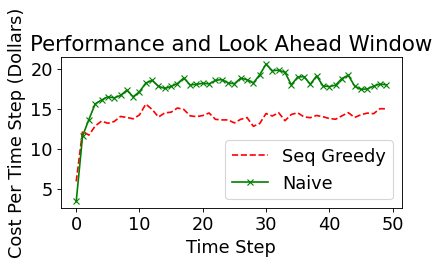

In [9]:
# Plot the plot
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


# Set Font Size Limitations
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)
figure(num=None, figsize=(5.5, 2.5), dpi=80, facecolor='w', edgecolor='k')

x_ax = np.arange(50)

plt.plot(x_ax, SG_cost_per_time, 'r--', label = 'Seq Greedy')
plt.plot(x_ax, Naive_cost_per_time, 'g-x', label = 'Naive')

plt.legend(loc = 'lower right')

plt.title('Performance and Look Ahead Window')
plt.xlabel('Time Step')
plt.ylabel('Cost Per Time Step (Dollars)')